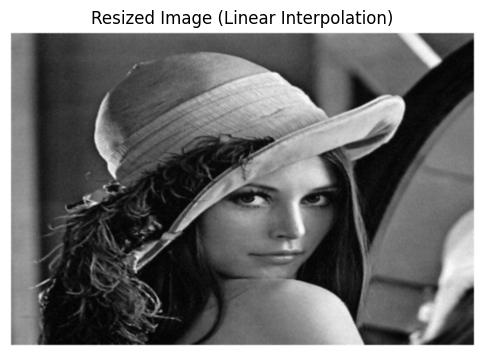

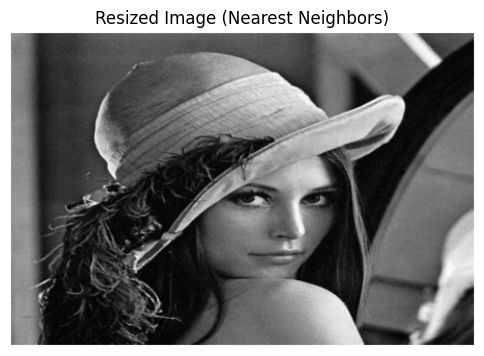

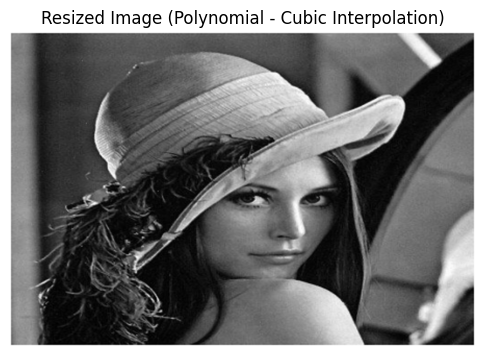

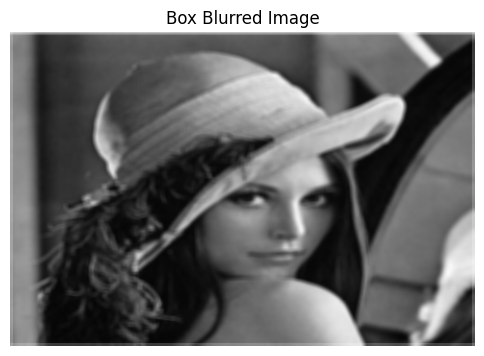

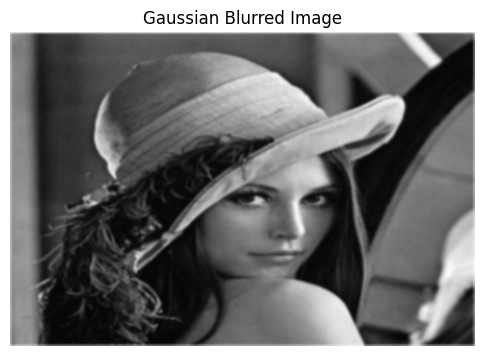

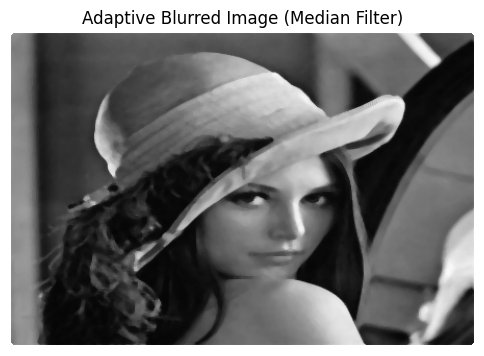

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Function to display an image
def display_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load an example image (replace with your own image path)
image_path = "/content/image.png"  # Change to your image
image = cv2.imread(image_path)

# 1.1 Image Resizing
# 1.1.1 Linear Interpolation
resized_linear = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
display_image("Resized Image (Linear Interpolation)", resized_linear)

# 1.1.2 Nearest Neighbors Interpolation
resized_nearest = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
display_image("Resized Image (Nearest Neighbors)", resized_nearest)

# 1.1.3 Polynomial Interpolation (Cubic)
resized_cubic = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
display_image("Resized Image (Polynomial - Cubic Interpolation)", resized_cubic)

# 1.2 Image Blurring
# 1.2.1 Box Blurring
box_blurred = cv2.blur(image, (5, 5))  # Kernel size is 5x5
display_image("Box Blurred Image", box_blurred)

# 1.2.2 Gaussian Blurring
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel size is 5x5, sigma is 0
display_image("Gaussian Blurred Image", gaussian_blurred)

# 1.2.3 Adaptive Blurring (Median Filter)
adaptive_blurred = cv2.medianBlur(image, 5)  # Kernel size is 5
display_image("Adaptive Blurred Image (Median Filter)", adaptive_blurred)



===== Naive Bayes Model Evaluation =====
Cross-Validation Accuracy Scores: [0.84375    0.82986111 0.85017422 0.86062718 0.81184669]
Mean CV Accuracy: 0.8393
Accuracy: 0.8472
Precision: 0.8751
Recall: 0.8472
F1-Score: 0.8490
Confusion Matrix:
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]
AUC Score: 0.9905


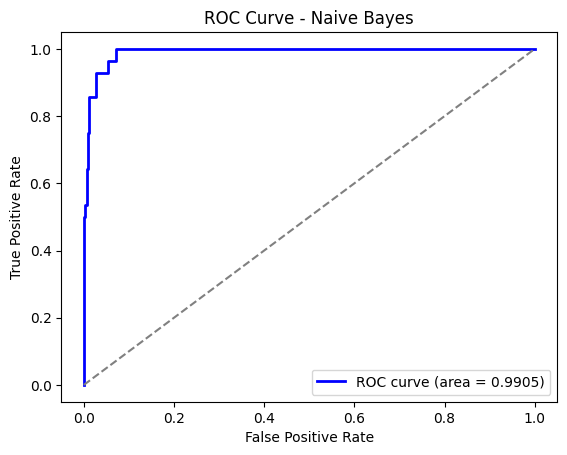


===== SVM Model Evaluation =====
Cross-Validation Accuracy Scores: [0.99305556 0.97222222 0.97909408 0.98606272 0.97560976]
Mean CV Accuracy: 0.9812
Accuracy: 0.9778
Precision: 0.9779
Recall: 0.9778
F1-Score: 0.9777
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]
AUC Score: 1.0000


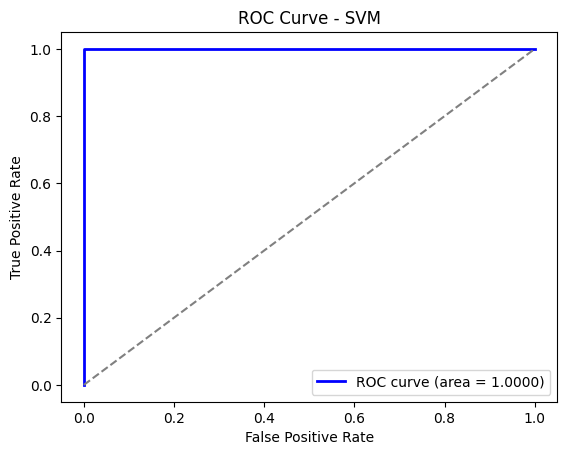

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Load MNIST dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear', probability=True)  # Using linear kernel
}

# Apply K-Fold Cross Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n===== {model_name} Model Evaluation =====")

    # Perform K-Fold Cross Validation
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {scores}")
    print(f"Mean CV Accuracy: {np.mean(scores):.4f}")

    # Train the model on full training data
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # ROC and AUC (only for models that support probability predictions)
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")

        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()
